# **Theory**
---


## **Question 1**
*Suppose you have an MLP composed of an input of size 10, followed by one hidden layer with output of size 50, and finally one output layer with 3 output neurons. All artificial neurons use the ReLU activation function. The batch size used is.*

---
### a. What is the shape of the input $ X $?
The input $ X $ is a batch of size $ m $ with 10 features per sample. Therefore, its shape is:
$ X \in \mathbb{R}^{m \times 10} $

---

### b. What about the shape of the hidden layer's weight vector $ W_h $, and the shape of its bias vector $ b_h $?
- $ W_h $: This weight matrix maps the 10 input features to 50 hidden layer neurons. Its shape is:
$ W_h \in \mathbb{R}^{10 \times 50} $
- $ b_h $: This bias vector is added to the 50 neurons in the hidden layer. Its shape is:
$ b_h \in \mathbb{R}^{50} $

---

### c. What is the shape of the output layer's weight vector $ W_o $, and its bias vector $ b_o $?
- $ W_o $: This weight matrix maps the 50 hidden neurons to 3 output neurons. Its shape is:
$ W_o \in \mathbb{R}^{50 \times 3} $
- $ b_o $: This bias vector is added to the 3 output neurons. Its shape is:
$ b_o \in \mathbb{R}^{3} $

---

### d. What is the shape of the network's output matrix $ Y $?
The output matrix $ Y $ contains the predictions for $ m $ samples, each with 3 output values. Its shape is:
$ Y \in \mathbb{R}^{m \times 3} $

---

### e. Write the equation that computes the network's output matrix $ Y $ as a function of $ X, W_h, b_h, W_o, $ and $ b_o $.
The computation of the output $ Y $ involves the following steps:
1. Compute the pre-activation for the hidden layer:
   $ Z_h = X W_h + b_h $

2. Apply the ReLU activation function:
   $ H = \text{ReLU}(Z_h) = \max(0, Z_h) $

3. Compute the pre-activation for the output layer:
   $ Z_o = H W_o + b_o $

4. (Optional) Apply a non-linear activation to $ Z_o $, if specified, such as softmax for classification.

In an MLP, the right thing to do for the output layer depends on the specific task we are solving, diffrent task requires a diffrent activation function.
Therefore, we will write a general form:

$$ Y = Φ(\text{ReLU}(X W_h + b_h) W_o + b_o) $$

Where $ Φ $ is the activation function of the output layer

---

## **Question 2**
*Consider a CNN composed of three convolutional layers, each with $\ 3 × 3$
kernels, a stride of $\ 2 $, and SAME padding. The lowest layer outputs $\ 100 $ feature maps, the middle one outputs $\ 200 $, and the top one outputs $\ 400 $. The input images are RGB images of $\ 200 × 300$ pixels. What is the total number of parameters in the CNN? Explain your answer.*

---

Each convolution layer has its own feature maps, with each feature map holding parameters equal to the size of the feature map multiplied by the number of input channels. Each convolution layer's output has channels corresponding to the number of feature maps in the layer, which then functions as a multi-channel input for the next layer. After a convolution operation with a feature map, we have an additional parameter for bias.

For the first layer, the input is an RGB image (each index has 3 entries), so the number of parameters per feature map of size $3 \times 3$ is:

$$
\text{Layer 1}: \text{Feature maps} \cdot (3 \cdot 3 \cdot \text{Channels} + 1) = 100 \cdot (3 \cdot 3 \cdot 3 + 1)
$$

Now we'll calculate the number of parameters in each convolution layer and sum them up:

$$
\text{Layer 2}: 200 \cdot (3 \cdot 3 \cdot 100 + 1)
$$

$$
\text{Layer 3}: 400 \cdot (3 \cdot 3 \cdot 200 + 1)
$$

$$
⇒\text{Total of } 903,400 \text{ parameters}
$$

- The parameters of a CNN comes from the feature maps and bias only!

---


# Question 3
*In this question, we shall derive the gradient for a batch normalization layer. The algorithm of Batch Normalization, as taken directly from the original paper by Sergey Ioffe and Christian Szegedy*

$\textbf{Input:}$ Values of $x$ over a mini-batch: $\mathcal{B} = \{x_1, \dots, x_m\}$; \\
Parameters to be learned: $\gamma, \beta$ \\
$\textbf{Output:}$ $\{y_i = \text{BN}_{\gamma, \beta}(x_i)\}$

\begin{align*}
(1) \mu_{\mathcal{B}} &\leftarrow \frac{1}{m} \sum_{i=1}  {m} x_i && \text{// mini-batch mean} \\
(2) \sigma_{\mathcal{B}}^2 &\leftarrow \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_{\mathcal{B}})^2 && \text{// mini-batch variance} \\
(3) \hat{x}_i &\leftarrow \frac{x_i - \mu_{\mathcal{B}}}{\sqrt{\sigma_{\mathcal{B}}^2 + \epsilon}} && \text{// normalize} \\
(4) y_i &\leftarrow \gamma \hat{x}_i + \beta \equiv \text{BN}_{\gamma, \beta}(x_i) && \text{// scale and shift}
\end{align*}

---
a. $\frac{\partial f}{\partial γ} = \sum_{i=1}^{m} \frac{\partial f}{\partial y_i} \cdot \frac{\partial y_i}{\partial γ} \underset{(4)}{=} \sum_{i=1}^{m}\frac{\partial f}{\partial y_i}⋅\hat{x}_i$

b. $\frac{∂ f}{∂ β} = \sum_{i=1}^{m} \frac{∂ f}{∂ y_i}⋅\frac{∂ y_i}{∂ β} \underset{(4)}{=} \sum_{i=1}^{m} \frac{∂ f}{∂ y_i}⋅\frac{∂ (γ\hat{x}_i+β)}{∂β} \underset{\frac{∂ (γ\hat{x}_i+β)}{∂β}=1}{=} \sum_{i=1}^{m} \frac{∂ f}{∂ y_i} $

c. $\frac{∂ f}{∂\hat{x_i}} = \frac{∂ f}{∂ y_i}⋅\frac{∂ y_i}{∂\hat{x_i}}\underset{(4)}{=} \frac{∂ f}{∂ y_i}⋅γ$

d. $\frac{∂ f}{∂ \sigma^2} =\sum_{i=1}^{m}\frac{∂ f}{∂ \hat{x}_i}⋅\frac{∂ \hat{x}_i}{∂ σ^2} \underset{Derive (3)}{=} -\sum_{i=1}^{m}\frac{∂ f}{∂ \hat{x}_i}⋅ \frac{x_i-μ}{2(σ^2+ϵ)^\frac{3}{2}} \underset{(c)}{=} -\sum_{i=1}^{m}\frac{∂ f}{∂ y_i}⋅γ⋅ \frac{x_i-μ}{2(σ^2+ϵ)^\frac{3}{2}} $

e. $\frac{∂ f}{∂ μ} \underset{(2),(3)}{=}\sum_{i=1}^{m} \frac{∂ f}{∂ \hat{x}_i}⋅\frac{∂ \hat{x}_i}{∂ μ} + \frac{∂ f}{∂ σ^2}⋅\frac{∂ σ^2}{∂ μ} \underset{\text{(c), derive }(3)}{=}-\sum_{i=1}^{m}\frac{∂ f}{∂ y_i}⋅\frac{γ}{\sqrt{σ^2+ϵ}}$

f. $\frac{∂ f}{∂x_i} = \frac{∂ f}{∂ \hat{x}_i}⋅\frac{∂ \hat{x}_i}{∂ x_i}+\frac{∂ f}{∂ μ}⋅\frac{∂ \mu}{∂ x_i}+\frac{∂ f}{∂ \sigma^2}⋅\frac{∂ σ^2}{∂ x_i} \underset{\text{(c), (e), (d) derive }(3)}{=} \frac{γ}{\sqrt{σ^2+ϵ}}⋅\frac{∂ f}{∂ y_i}-\frac{∂ \mu}{∂ x_i}⋅\sum_{j=1}^{m}\frac{∂ f}{∂ y_j}⋅\frac{γ}{\sqrt{σ^2+ϵ}}-\frac{∂ σ^2}{∂ x_i}⋅\sum_{j=1}^{m}\frac{∂ f}{∂ y_j}⋅γ⋅ \frac{x_j-μ}{2(σ^2+ϵ)^\frac{3}{2}} \underset{\text{Derive (1), Derive (2)}}{=} \frac{γ}{\sqrt{σ^2+ϵ}}⋅\frac{∂ f}{∂ y_i}-\frac{1}{m}⋅\sum_{j=1}^{m}\frac{∂ f}{∂ y_j}⋅\frac{γ}{\sqrt{σ^2+ϵ}}-\frac{2(x_j-μ)}{m}⋅\sum_{j=1}^{m}\frac{∂ f}{∂ y_j}⋅γ⋅ \frac{x_j-μ}{2(σ^2+ϵ)^\frac{3}{2}}$

# **Practical**


## *Question 4 - Results*
Implement the Lenet5 network over the FashionMNIST data set.

Compare the usage of the following techniques with Lenet5:

* Dropout (at the hidden layer)

* Weight Decay (also known as l2 loss)

* Batch Normalization

  **a**. A convergence graph is a graph with epochs as x-axis, and
accuracy as y-axis. Provide a convergence graph for each of the
three techniques – and for each of them plot one graph for the
accuracy on the train data and one for the test. In addition, plot one
graph without regularization (8 graphs in total).

  **b**. Note: For dropout, the train accuracy must be measured without
dropout.

  **c**. Provide a table, which summarizes all 8 final accuracies.

  **d**. Make Conclusions regarding the results.

Comments:

* Describe in the readme file how to train each setting, and how to test it
with the saved weights.

* All graphs should be clear with a proper heading. It is highly
recommended (but not mandatory) to plot the train and test graphs for
each technique together in the same plot (only 4 plots in total).

* For dropout, the train accuracy must be measured without dropout.

* The leaning rate, and optimizer are up to your choice. Despite that, if
you do not achieve at least 88% test accuracy – you're doing something
wrong! (much more can be achieved).
---

The architecture of the LeNet 5 we implemented:
Based on the network studied in class, a classic neural network architecture for image classification.

***The architecture:***

*Layers*
1. *Convolutional layer* -   `1 input channel`, `6 output channels`, a `kernel size` of 5, and `padding` of 2.
Followed by `ReLU activation` and `average pooling` with a kernel size of 2 and stride of 2.

2. *Convolutional layer* -  6 input channels (amount of output channels from the previous layer), 16 output channels, a kernel
size of 5. Followed by ReLU activation and average pooling with a kernel size of 2 and stride of 2.

3. *Fully connected layer* -   5 * 5 * 16 input features and 120 output features. Followed by ReLU
activation.

4. *Fully connected layer* -  120 input features and 84 output features. Followed by ReLU
activation.

5. *Fully connected layer*  -  84 input features and 10 output features.

*Regularization types*

1. Dropout is applied after the first fully connected layer and after the second fully connected layer.

2. Batch Normalization is applied after each Convolutional layer.

3. Initialization of the model with weight decay.


***Hyperparameters***


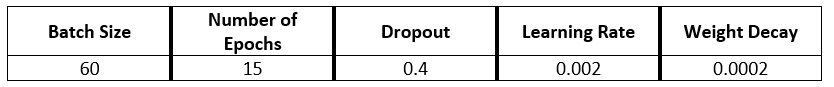

***Results***

*Final*


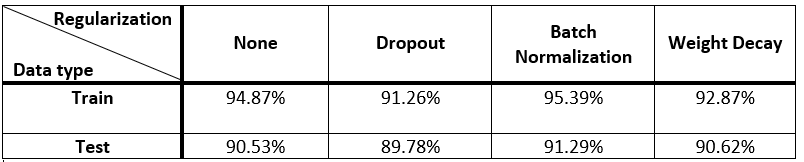


*Best*


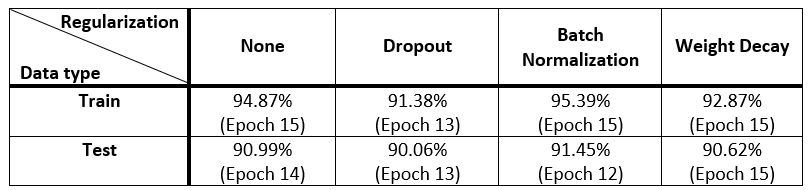

*Graphs*

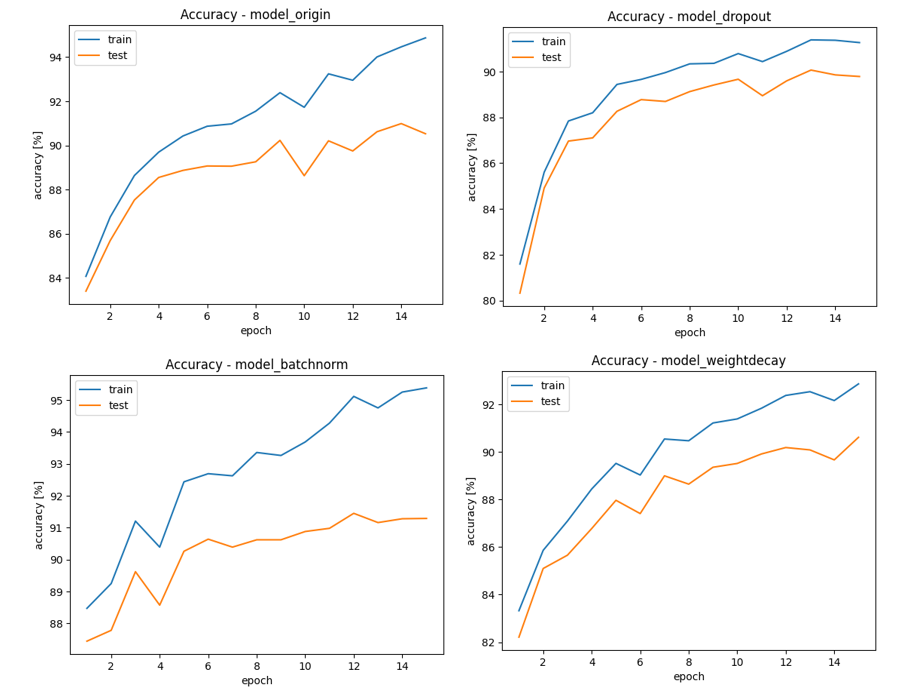

***Conclusions***



*	While Dropout is typically expected to help address overfitting and improve model generalization, we observe a slight reduction in training accuracy without a corresponding improvement in test accuracy. It does, however, narrow the gap between training and test accuracies, but not beyond that.

*	By achieving the highest test accuracy in this occasion, Batch normalization emerges as the most effective regularization technique. It addresses internal covariate shift and speeds up convergence during training.

*	Weight decay provides a small improvement in test accuracy, indicating that it helps control the model's complexity and contributes to better generalization.


* As demonstrated above, no single regularization technique universally improves accuracy. Its effectiveness depends on the scenario, including the dataset and the target task.


##*ReadMe*

We used some of the code from the git of the Udacity course: "Intro to deep learning with Pytorch"

https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/cifar-cnn/cifar10_cnn_solution.ipynb


## **Code**


In [ ]:
# Import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch dataset
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# PyTorch model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 60


In [ ]:
# Data transform to convert data to a tensor and apply normalization

# augment train and validation dataset with RandomHorizontalFlip and RandomRotation
train_transform = transforms.ToTensor()

"""transforms.Compose([
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
"""

test_transform = transforms.ToTensor()

"""transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])"""

'transforms.Compose([\n    transforms.ToTensor(),\n    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))\n    ])'

In [ ]:
# choose the training and test datasets
train_data = datasets.FashionMNIST('FashionMNIST/raw/train-images-idx3-ubyte', train=True,
                              download=True, transform=train_transform)
test_data = datasets.FashionMNIST('FashionMNIST/raw/t10k-images-idx3-ubyte', train=False,
                             download=True, transform=test_transform)

In [ ]:
# obtain training indices
num_train = len(train_data)
train_idx = list(range(num_train))
np.random.shuffle(train_idx)

In [ ]:
# define samplers for obtaining training
train_sampler = SubsetRandomSampler(train_idx)

In [ ]:
# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
    num_workers=num_workers)

In [ ]:
# specify the image classes
classes = ["T-shirt/top"
           ,"Trouser"
           ,"Pullover"
           ,"Dress"
           ,"Coat"
           ,"Sandal"
           ,"Shirt"
           ,"Sneaker"
           ,"Bag"
           ,"Ankle boot"]


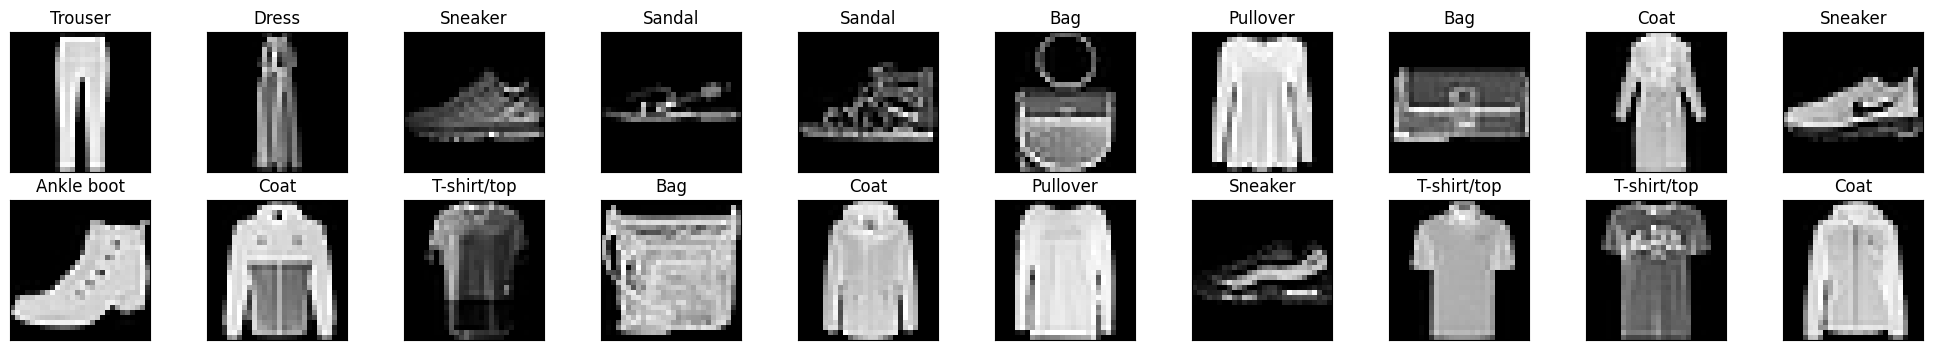

In [ ]:
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)),cmap='gray')  # convert from Tensor image

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display
images.shape # (number of examples: 20, number of channels: 1, pixel sizes: 28x28)

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), int(idx+1), xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [ ]:
# define the CNN architecture
class Net_dropout(nn.Module):
    def __init__(self):
        super(Net_dropout, self).__init__()
        # convolutional layer (sees 28x28x1 -> 28x28x6 image tensor)
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        # convolutional layer (sees 14x14x6 -> 10x10x16 tensor)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=0)
        # Avg pooling layer
        self.pool = nn.AvgPool2d(2, 2)
        # linear layer (16 * 5 * 5 -> 120)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # linear layer (120 -> 84)
        self.fc2 = nn.Linear(120, 84)
        # linear layer (84 -> 10)
        self.fc3 = nn.Linear(84, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten image input
        x = x.view(-1, 16 * 5 * 5)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add another dropout layer
        x = self.dropout(x)
        # add 2st hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # fully connected for an output size
        x = self.fc3(x)
        # Log SoftMax activation function for output
        x= F.log_softmax(x, dim=1)
        return x

In [ ]:
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 28x28x1 -> 28x28x6 image tensor)
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        # convolutional layer (sees 14x14x6 -> 10x10x16 tensor)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=0)
        # Max pooling layer
        self.pool = nn.AvgPool2d(2, 2)
        # linear layer (16 * 5 * 5 -> 120)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # linear layer (120 -> 84)
        self.fc2 = nn.Linear(120, 84)
        # linear layer (84 -> 10)
        self.fc3 = nn.Linear(84, 10)




    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten image input
        x = x.view(-1, 16 * 5 * 5)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add 2st hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # fully connected for an output size
        x = self.fc3(x)
        # Log SoftMax activation function for output
        x= F.log_softmax(x, dim=1)
        return x

In [ ]:
# define the CNN architecture
class Net_BatchNorm(nn.Module):
    def __init__(self):
        super(Net_BatchNorm, self).__init__()
        # convolutional layer (sees 28x28x1 image tensor)
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        # convolutional layer (sees 14x14x6 tensor)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=0)
        # batch normalization layer (for conv1)
        self.bn1 = nn.BatchNorm2d(6)
        # batch normalization layer (for conv2)
        self.bn2 = nn.BatchNorm2d(16)
        # max pooling layer
        self.pool = nn.AvgPool2d(2, 2)
        # linear layer (16 * 5 * 5 -> 120)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # linear layer (120 -> 10)
        self.fc2 = nn.Linear(120, 84)
        # linear layer (84 -> 10)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        # add sequence of convolutional, batch normalization and max pooling layers
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        # flatten image input
        x = x.view(-1, 16 * 5 * 5)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add 2st hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # fully connected for an output size
        x = self.fc3(x)
        # Log SoftMax activation function for output
        x= F.log_softmax(x, dim=1)
        return x

In [ ]:
# create a various complete CNN
model_origin = Net()
model_dropout = Net_dropout()
model_batchnorm = Net_BatchNorm()
model_weightdecay = Net()

models = [(model_origin,"model_origin"), (model_dropout,"model_dropout"),
          (model_batchnorm,"model_batchnorm"),(model_weightdecay,"model_weightdecay")]

print(model_origin)
print(model_dropout)
print(model_batchnorm)
print(model_weightdecay)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Net_dropout(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)
Net_BatchNorm(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, mo

In [ ]:
#training the different models
for i in range(4):

  #defining the wanted model
  model = models[i][0]
  print(models[i][1])

  # specify loss function (categorical cross-entropy)
  criterion = nn.CrossEntropyLoss()

  # specify optimizer
  if i != 3:
    optimizer = optim.Adam(model.parameters(), lr=0.002)
  else:
    optimizer = optim.Adam(model.parameters(), weight_decay = 0.0002, lr=0.002)

  # move tensors to GPU if CUDA is available
  if train_on_gpu:
      model.cuda()

  # number of epochs to train the model
  n_epochs = 15

  for epoch in range(1, n_epochs+1):

      # keep track of training and validation loss
      train_loss = 0.0

      ###################
      # train the model #
      ###################
      model.train()
      for data, target in train_loader:
          # move tensors to GPU if CUDA is available
          if train_on_gpu:
              data, target = data.cuda(), target.cuda()
          # clear the gradients of all optimized variables
          optimizer.zero_grad()
          # forward pass: compute predicted outputs by passing inputs to the model
          output = model(data)
          # calculate the batch loss
          loss = criterion(output, target)
          # backward pass: compute gradient of the loss with respect to model parameters
          loss.backward()
          # perform a single optimization step (parameter update)
          optimizer.step()
          # update training loss
          train_loss += loss.item()*data.size(0)

      # calculate average losses
      train_loss = train_loss/len(train_loader.sampler)

      # print training/validation statistics
      print('Epoch: {} \tTraining Loss: {:.6f}'.format(
          epoch, train_loss))

      # save model
      torch.save(model.state_dict(), f'{models[i][1]}_{epoch}.pt')



model_origin
Epoch: 1 	Training Loss: 0.618084
Epoch: 2 	Training Loss: 0.406459
Epoch: 3 	Training Loss: 0.338788
Epoch: 4 	Training Loss: 0.307303
Epoch: 5 	Training Loss: 0.279071
Epoch: 6 	Training Loss: 0.262914
Epoch: 7 	Training Loss: 0.247373
Epoch: 8 	Training Loss: 0.232761
Epoch: 9 	Training Loss: 0.220847
Epoch: 10 	Training Loss: 0.211037
Epoch: 11 	Training Loss: 0.198580
Epoch: 12 	Training Loss: 0.188577
Epoch: 13 	Training Loss: 0.181027
Epoch: 14 	Training Loss: 0.172336
Epoch: 15 	Training Loss: 0.165728
model_dropout
Epoch: 1 	Training Loss: 0.737872
Epoch: 2 	Training Loss: 0.506374
Epoch: 3 	Training Loss: 0.442427
Epoch: 4 	Training Loss: 0.407771
Epoch: 5 	Training Loss: 0.385520
Epoch: 6 	Training Loss: 0.369415
Epoch: 7 	Training Loss: 0.356125
Epoch: 8 	Training Loss: 0.349056
Epoch: 9 	Training Loss: 0.343287
Epoch: 10 	Training Loss: 0.338929
Epoch: 11 	Training Loss: 0.330886
Epoch: 12 	Training Loss: 0.327041
Epoch: 13 	Training Loss: 0.323469
Epoch: 14 	

In [ ]:
#accuracys of per model models
accuracy = []

#testing various models
for idx in range(4):
  #defining the wanted model
  model = models[idx][0]
  print(f"\n{models[idx][1]}\n")

  # defining a list of accuracy per epoch with item's: [train_accuracy, test_accuracy]
  accuracy_model = []

  for epoch in range(1, n_epochs+1):
    print(f"\n*** epoch number: {epoch} ***\n")
    # loads the model
    model.load_state_dict(torch.load(f'{models[idx][1]}_{epoch}.pt'))
    # changing model into evaluation mode
    model.eval()

    # specify loss function (categorical cross-entropy)
    criterion = nn.CrossEntropyLoss()

    #list of current epoch's accuracy's
    epoch_accuracy = []

    # words list
    word_list = ["Train", "Test"]
    # switching between the training and testing loaders
    for idx_word,testing_data in enumerate([train_loader, test_loader]):

      ###################
      # test the model #
      ###################

      # track test loss
      test_loss = 0.0
      class_correct = list(0. for i in range(10))
      class_total = list(0. for i in range(10))


      # iterate over test data
      for data, target in testing_data:
          # move tensors to GPU if CUDA is available
          if train_on_gpu:
              data, target = data.cuda(), target.cuda()
          # forward pass: compute predicted outputs by passing inputs to the model
          output = model(data)
          # calculate the batch loss
          loss = criterion(output, target)
          # update test loss
          test_loss += loss.item()*data.size(0)
          # convert output probabilities to predicted class
          _, pred = torch.max(output, 1)
          # compare predictions to true label
          correct_tensor = pred.eq(target.data.view_as(pred))
          correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
          # calculate test accuracy for each object class
          for i in range(min(batch_size, len(target.data))):
              label = target.data[i]
              class_correct[label] += correct[i].item()
              class_total[label] += 1

      # average test loss
      test_loss = test_loss/len(test_loader.dataset)
      print('--- {} Loss: {:.6f} ---\n'.format(word_list[idx_word],test_loss))

      for i in range(10):
          if class_total[i] > 0:
              print('%s Accuracy of %5s: %2d%% (%2d/%2d)' % (
                  word_list[idx_word],
                  classes[i], 100 * class_correct[i] / class_total[i],
                  np.sum(class_correct[i]), np.sum(class_total[i])))
          else:
              print('%s Accuracy of %5s: N/A (no training examples)' % (
                  word_list[idx_word],
                  classes[i]))

      # defining the current overall accuracy and adding it to: "epoch_accuracy"
      overall_accuracy = 100. * np.sum(class_correct) / np.sum(class_total)
      epoch_accuracy.append(overall_accuracy)

      print('\n ### %s Accuracy (Overall): %2d%% (%2d/%2d) ###\n' % (
          word_list[idx_word],
          overall_accuracy,
          np.sum(class_correct), np.sum(class_total)))

    # adding an epoch accuracies to: "accuracy_model"
    accuracy_model.append(epoch_accuracy)

  # adding accuracy_model to: "accuracy"
  accuracy.append(accuracy_model)




model_origin


*** epoch number: 1 ***



<ipython-input-55-b4fbe453b456>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{models[idx][1]}_{epoch}.pt'))


--- Train Loss: 2.585021 ---

Train Accuracy of T-shirt/top: 89% (5344/6000)
Train Accuracy of Trouser: 97% (5821/6000)
Train Accuracy of Pullover: 69% (4179/6000)
Train Accuracy of Dress: 87% (5230/6000)
Train Accuracy of  Coat: 83% (4993/6000)
Train Accuracy of Sandal: 94% (5688/6000)
Train Accuracy of Shirt: 37% (2251/6000)
Train Accuracy of Sneaker: 93% (5587/6000)
Train Accuracy of   Bag: 94% (5697/6000)
Train Accuracy of Ankle boot: 94% (5653/6000)

 ### Train Accuracy (Overall): 84% (50443/60000) ###

--- Test Loss: 0.452017 ---

Test Accuracy of T-shirt/top: 87% (875/1000)
Test Accuracy of Trouser: 96% (967/1000)
Test Accuracy of Pullover: 67% (675/1000)
Test Accuracy of Dress: 87% (871/1000)
Test Accuracy of  Coat: 81% (813/1000)
Test Accuracy of Sandal: 93% (937/1000)
Test Accuracy of Shirt: 37% (378/1000)
Test Accuracy of Sneaker: 93% (939/1000)
Test Accuracy of   Bag: 94% (946/1000)
Test Accuracy of Ankle boot: 93% (939/1000)

 ### Test Accuracy (Overall): 83% (8340/10000) 

model_origin


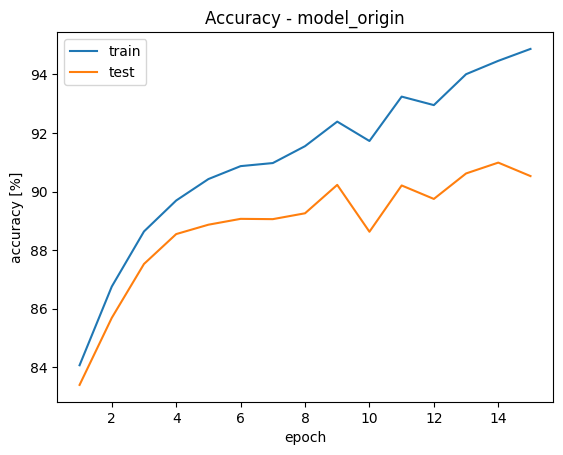

final train accuracy: 94.87166666666667
final test accuracy: 90.53

max train accuracy: 94.87166666666667 at epoch number 14
max test accuracy: 90.99 at epoch number 13

model_dropout


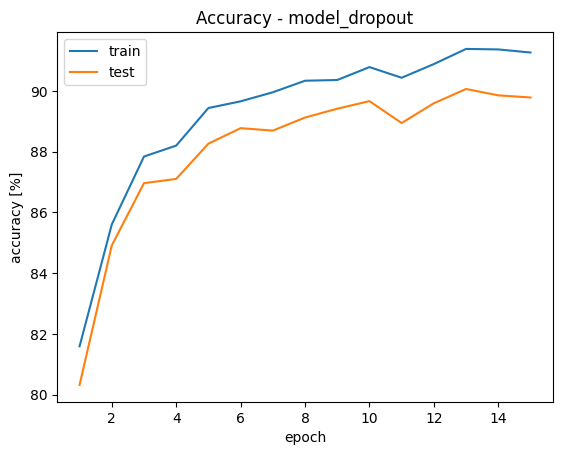

final train accuracy: 91.26
final test accuracy: 89.78

max train accuracy: 91.37833333333333 at epoch number 12
max test accuracy: 90.06 at epoch number 12

model_batchnorm


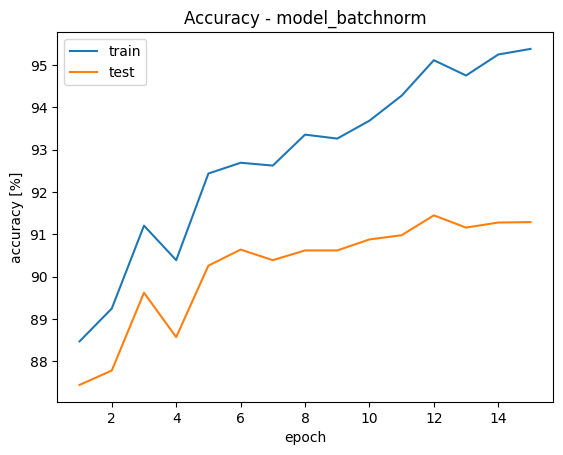

final train accuracy: 95.385
final test accuracy: 91.29

max train accuracy: 95.385 at epoch number 14
max test accuracy: 91.45 at epoch number 11

model_weightdecay


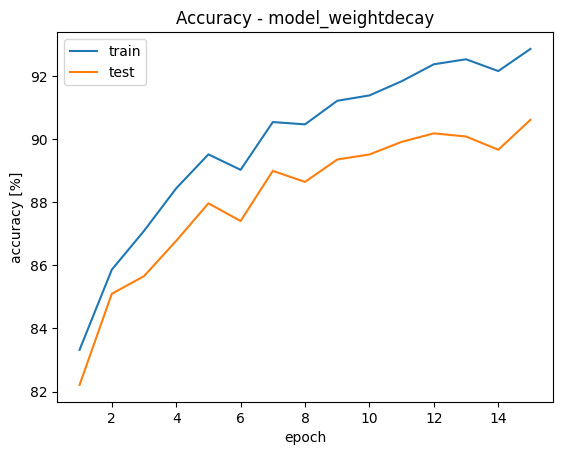

final train accuracy: 92.86833333333334
final test accuracy: 90.62

max train accuracy: 92.86833333333334 at epoch number 14
max test accuracy: 90.62 at epoch number 14



In [ ]:
# iterating througth models accuracies
for idx, model_acc in enumerate(accuracy):
  print(models[idx][1])

  # extracting tran,test accuracies
  epoch_train_acc = [i[0] for i in model_acc]
  epoch_test_acc = [i[1] for i in model_acc]

  #plotting
  plt.plot([i for i in range(1,n_epochs + 1)], epoch_train_acc, label='train')
  plt.plot([i for i in range(1,n_epochs + 1)], epoch_test_acc, label='test')
  plt.legend()
  plt.xlabel('epoch')
  plt.ylabel('accuracy [%]')
  plt.title(f'Accuracy - {models[idx][1]}')
  plt.show()

  # gives each model it's final accuracy and max accuracy
  print(f"final train accuracy: {epoch_train_acc[-1]}")
  print(f"final test accuracy: {epoch_test_acc[-1]}\n")
  print(f"max train accuracy: {max(epoch_train_acc)} at epoch number {epoch_train_acc.index(max(epoch_train_acc))+1}")
  print(f"max test accuracy: {max(epoch_test_acc)} at epoch number {epoch_test_acc.index(max(epoch_test_acc))+1}\n")

model_origin
model_dropout
model_batchnorm


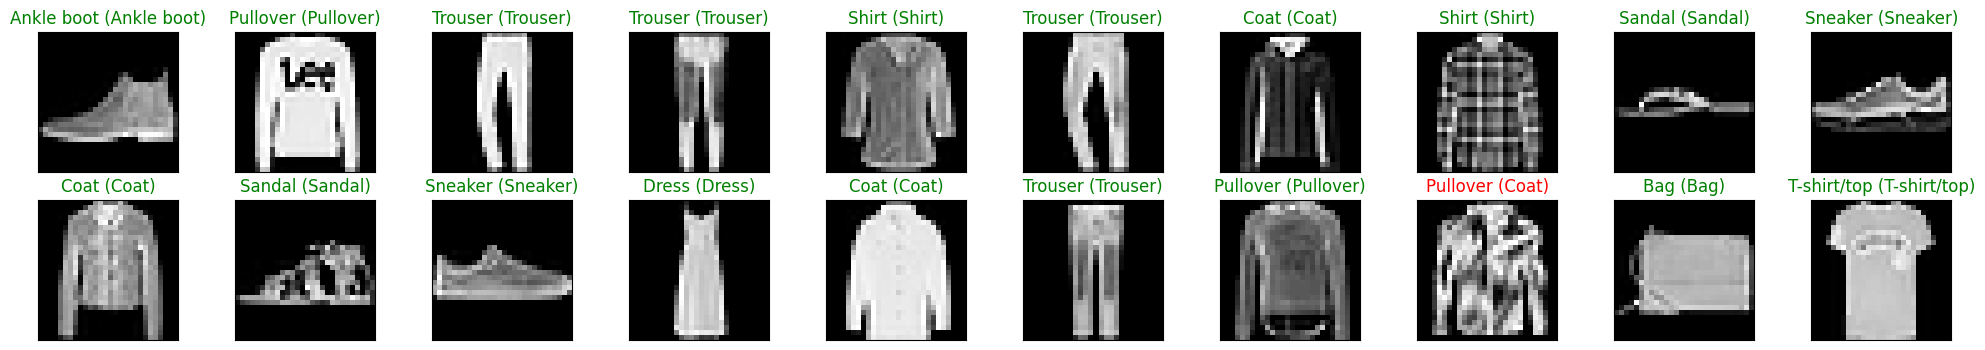

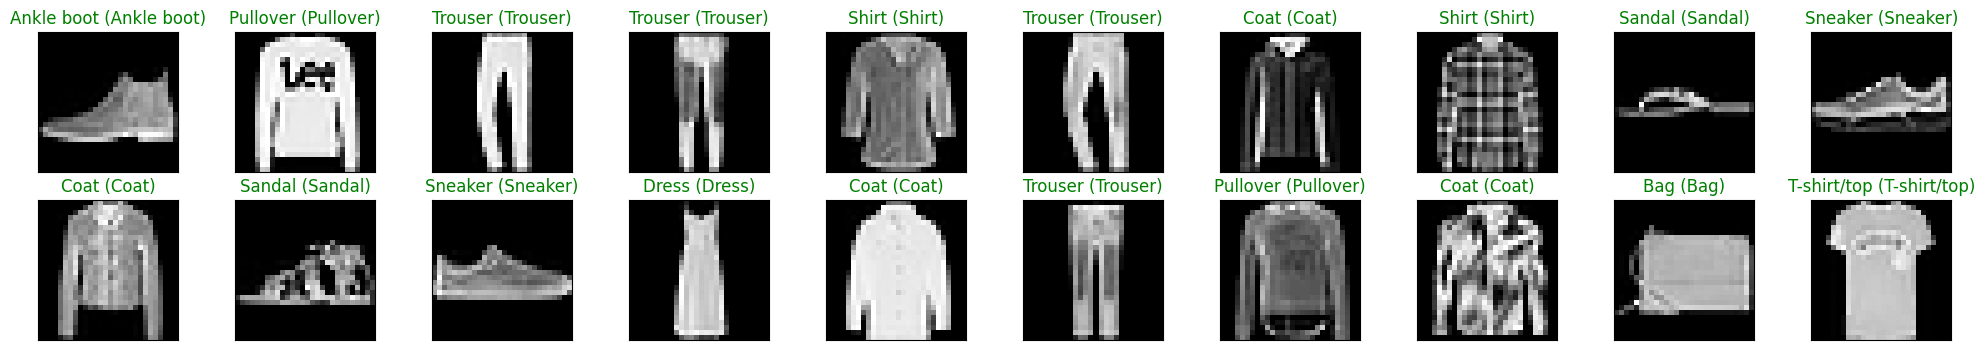

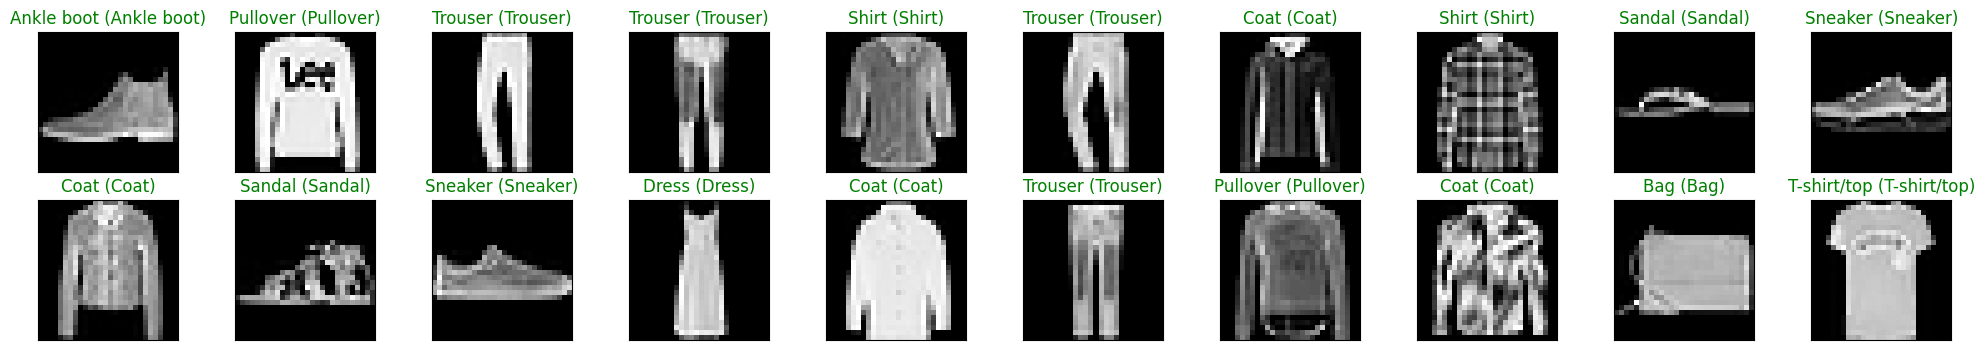

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

#testing various models
for i in range(3):
  if i < 3:
    #defining the wanted model
    model = models[i][0]
    print(models[i][1])

    # get sample outputs
    output = model(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(25, 4))
    for idx in np.arange(20):
        ax = fig.add_subplot(2, int(20/2), int(idx+1), xticks=[], yticks=[])
        imshow(images[idx] if not train_on_gpu else images[idx].cpu())
        ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
